In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_csv('/content/drive/MyDrive/projekt/njuskalo/data_njuskalo.csv')

In [4]:
data.head()

,Unnamed: 0,ad_id,link,county_number,county,location1,location2,apartment_type,sqft(m2),sqft_net(m2),...,balcony_type,number_of_floors,floor_number,floors_in_building,year_of_construction,year_of_renovation,parking_spots,energy_class,price(€),post_date
0,0,38904191,https://www.njuskalo.hr/nekretnine/odlicna-lok...,5.0,Varaždinska,Varaždin,Centar,1,63.66,NaN,...,NaN,1.0,2.,9,NaN,NaN,NaN,A+,133686.0,2024-06-11
1,1,38928077,https://www.njuskalo.hr/nekretnine/odlicna-lok...,5.0,Varaždinska,Varaždin,Centar,1,71.66,NaN,...,NaN,1.0,3.,9,NaN,NaN,NaN,A+,164818.0,2024-06-11
2,2,38928275,https://www.njuskalo.hr/nekretnine/odlicna-lok...,5.0,Varaždinska,Varaždin,Centar,1,87.50,NaN,...,NaN,1.0,4.,9,NaN,NaN,NaN,A+,201250.0,2024-06-11
3,3,38928333,https://www.njuskalo.hr/nekretnine/odlicna-lok...,5.0,Varaždinska,Varaždin,Centar,1,71.66,NaN,...,NaN,1.0,4.,9,NaN,NaN,NaN,A+,171984.0,2024-06-11
4,4,38928387,https://www.njuskalo.hr/nekretnine/odlicna-lok...,5.0,Varaždinska,Varaždin,Centar,1,64.42,NaN,...,NaN,1.0,4.,9,NaN,NaN,NaN,A+,154608.0,2024-06-11


In [5]:
#Remove NaN values
for el in data:
    data[el] = np.nan_to_num(data[el])

In [6]:
import seaborn as sns

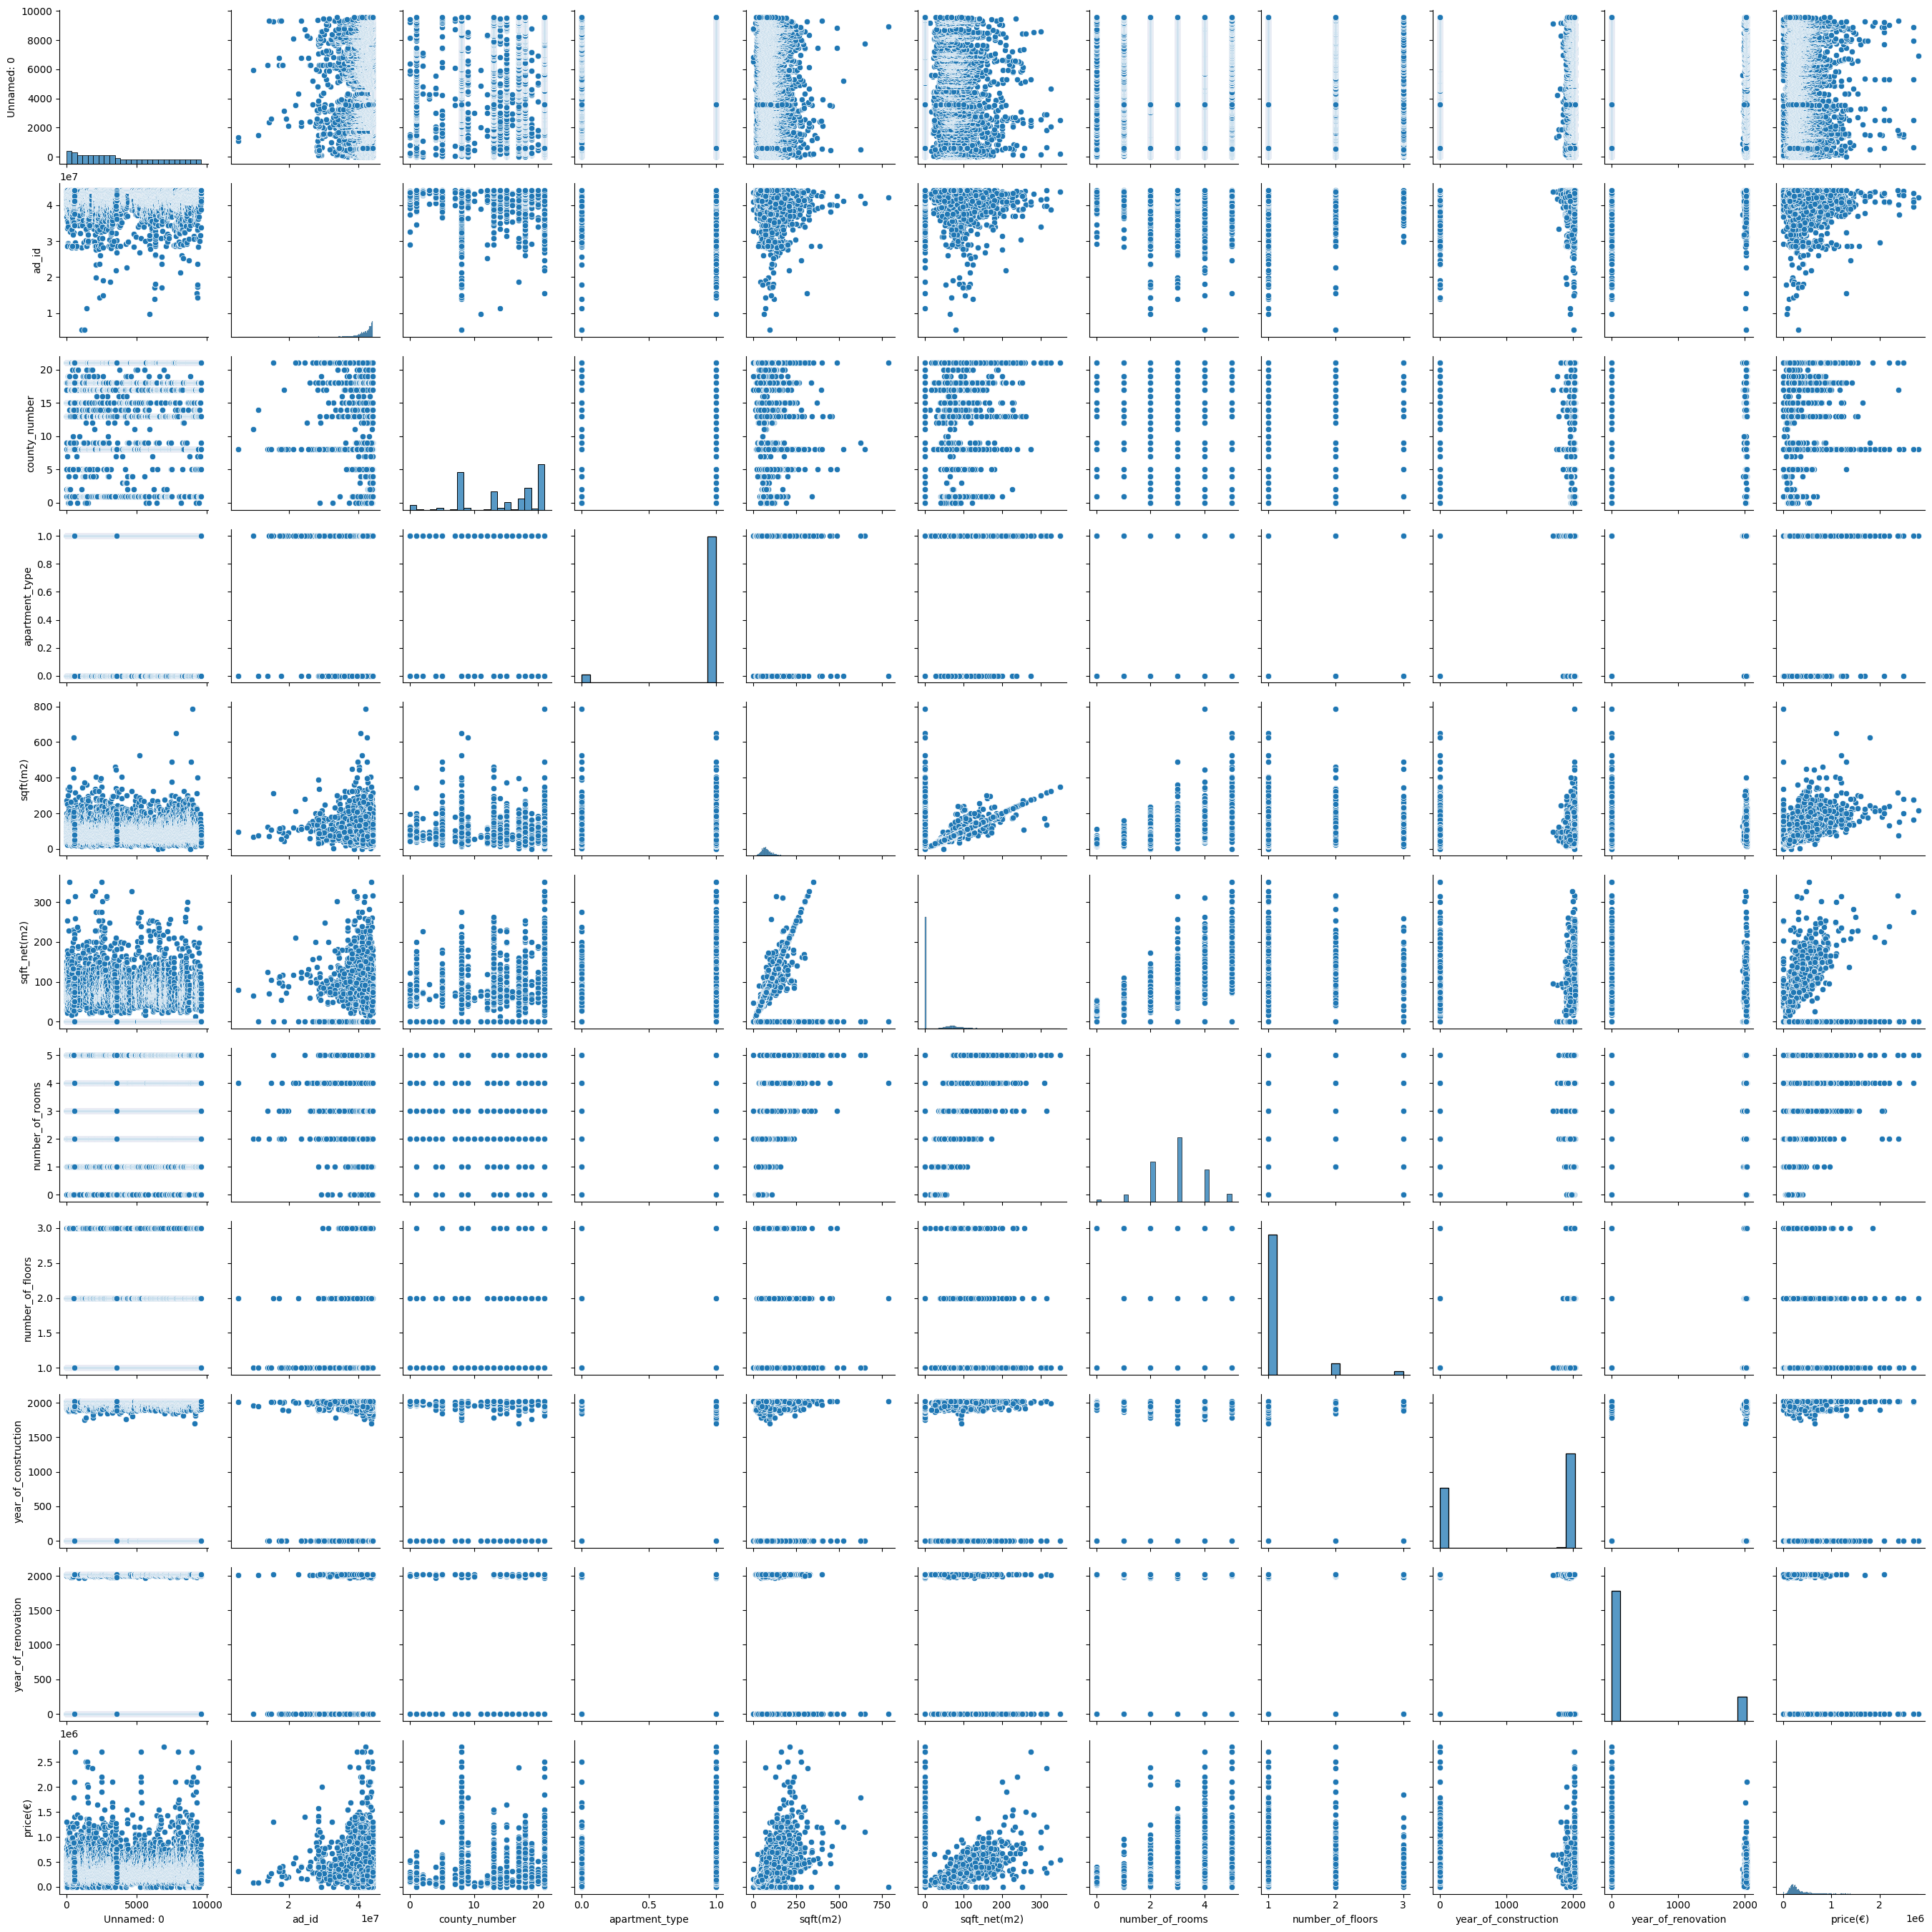

In [8]:
sns.pairplot(data)

In [7]:
x = data[['sqft(m2)', 'number_of_rooms', 'number_of_floors', 'year_of_construction', 'year_of_renovation', 'county_number']]
y = data[['price(€)']]

In [8]:
x

,sqft(m2),number_of_rooms,number_of_floors,year_of_construction,year_of_renovation,county_number
0,63.66,2.0,1.0,0.0,0.0,5.0
1,71.66,2.0,1.0,0.0,0.0,5.0
2,87.50,4.0,1.0,0.0,0.0,5.0
3,71.66,2.0,1.0,0.0,0.0,5.0
4,64.42,2.0,1.0,0.0,0.0,5.0
...,...,...,...,...,...,...
13769,74.01,2.0,1.0,0.0,0.0,17.0
13770,75.00,3.0,1.0,0.0,0.0,17.0
13771,43.61,2.0,1.0,0.0,0.0,18.0
13772,51.00,2.0,1.0,1955.0,0.0,21.0


In [8]:
X_train, X_test,y_train, y_test = train_test_split(x, y, train_size=0.95, random_state=1)

In [9]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (X_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 6, 128)            66560     
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 122241 (477.50 KB)
Trainable params: 122241 (477.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(X_train, y_train, batch_size=1, epochs=10)

Epoch 1/10
13085/13085 [==============================] - 140s 10ms/step - loss: 37936664576.0000
Epoch 2/10
13085/13085 [==============================] - 136s 10ms/step - loss: 27731849216.0000
Epoch 3/10
13085/13085 [==============================] - 133s 10ms/step - loss: 27191789568.0000
Epoch 4/10
13085/13085 [==============================] - 136s 10ms/step - loss: 25902987264.0000
Epoch 5/10
13085/13085 [==============================] - 133s 10ms/step - loss: 25781938176.0000
Epoch 6/10
13085/13085 [==============================] - 140s 11ms/step - loss: 25514244096.0000
Epoch 7/10
13085/13085 [==============================] - 134s 10ms/step - loss: 25243723776.0000
Epoch 8/10
13085/13085 [==============================] - 137s 10ms/step - loss: 25021253632.0000
Epoch 9/10
13085/13085 [==============================] - 135s 10ms/step - loss: 25019006976.0000
Epoch 10/10
13085/13085 [==============================] - 134s 10ms/step - loss: 25099622400.0000


In [12]:
predict = model.predict(X_test)

22/22 [==============================] - 1s 5ms/step


In [13]:
def mean_line(x, y):
    sqft = dict()
    i = 0
    for el in x:
        if round(el) not in sqft: sqft[round(el)] = [y[i]]
        else:
            value = [y[i]]
            for j in sqft[round(el)]:
                value.append(j)
            sqft[round(el)] = value
        i+=1
    for el in sqft:
        sqft[el] = round(np.mean(sqft[el]), 2)

    return sqft

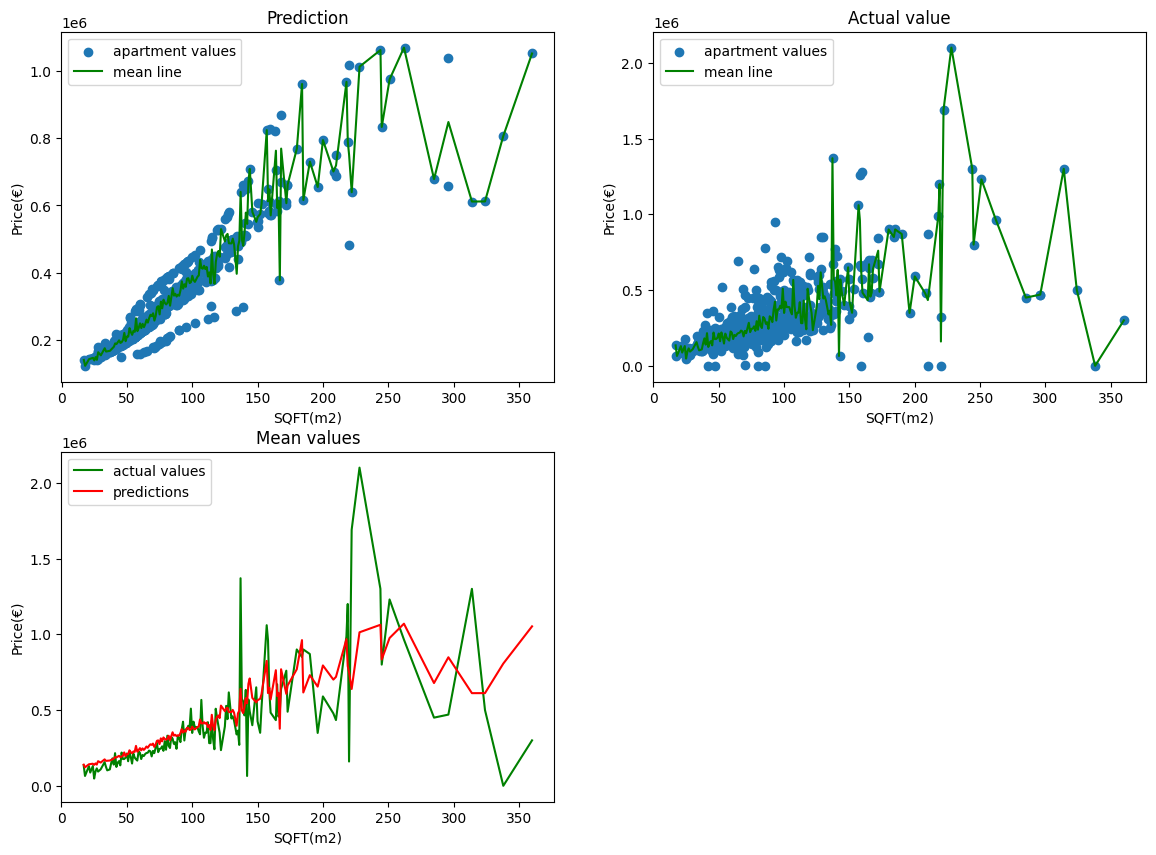

In [37]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(14)

#####
# Graph of predicted values
#
mean_predict = mean_line(X_test['sqft(m2)'], predict)
df_mean_predict = pd.DataFrame(mean_predict.items(), columns=['sqft', 'price'])
df_mean_predict = df_mean_predict.sort_values(by=['sqft'])

plt.subplot(2, 2, 1)
plt.scatter(X_test['sqft(m2)'], predict, label='apartment values')
plt.plot(df_mean_predict['sqft'].tolist(), df_mean_predict['price'].tolist(), color='g', label='mean line')
plt.title('Prediction')
plt.xlabel('SQFT(m2)')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')


#####
# Graph of actual values
#
mean = mean_line(X_test['sqft(m2)'], y_test['price(€)'].tolist())
df_mean = pd.DataFrame(mean.items(), columns=['sqft', 'price'])
df_mean = df_mean.sort_values(by=['sqft'])


plt.subplot(2, 2, 2)
plt.scatter(X_test['sqft(m2)'], y_test, label='apartment values')
plt.plot(df_mean['sqft'].tolist(), df_mean['price'].tolist(), color='g', label='mean line')
plt.title('Actual value')
plt.xlabel('SQFT(m2)')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')

#####
# Mean line comparison
#
plt.subplot(2, 2, 3)
plt.plot(df_mean['sqft'].tolist(), df_mean['price'].tolist(), color='g', label='actual values')
plt.plot(df_mean_predict['sqft'].tolist(), df_mean_predict['price'].tolist(), color='r', label='predictions')
plt.title('Mean values')
plt.xlabel('SQFT(m2)')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')


plt.show()

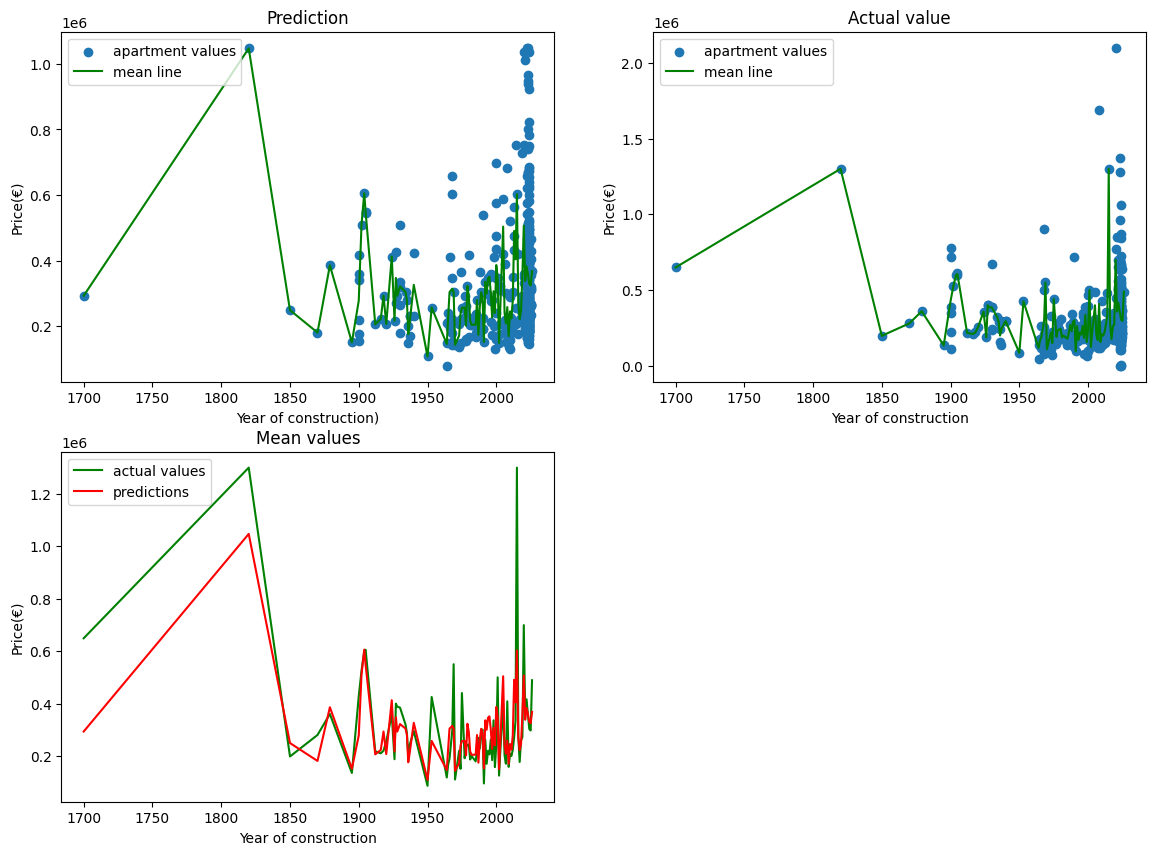

In [16]:
y_list = y_test['price(€)'].tolist()
x_filtered = []
y_filtered = []
predict_filtered = []
i = 0
for el in X_test['year_of_construction']:
    if el != 0.0:
        x_filtered.append(el)
        y_filtered.append(y_list[i])
        predict_filtered.append(predict[i])
    i+=1

fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(14)

#####
# Graph of predicted values
#
mean = mean_line(x_filtered, predict_filtered)
df_mean_predict = pd.DataFrame(mean.items(), columns=['year_of_construction', 'price'])
df_mean_predict = df_mean_predict.sort_values(by=['year_of_construction'])

plt.subplot(2, 2, 1)
plt.scatter(x_filtered, predict_filtered, label='apartment values')
plt.plot(df_mean_predict['year_of_construction'].tolist(), df_mean_predict['price'].tolist(), color='g', label='mean line')
plt.title('Prediction')
plt.xlabel('Year of construction)')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')

#####
# Graph of actual values
#
mean = mean_line(x_filtered, y_filtered)
df_mean = pd.DataFrame(mean.items(), columns=['year_of_construction', 'price'])
df_mean = df_mean.sort_values(by=['year_of_construction'])

plt.subplot(2, 2, 2)
plt.scatter(x_filtered, y_filtered, label='apartment values')
plt.plot(df_mean['year_of_construction'].tolist(), df_mean['price'].tolist(), color='g', label='mean line')
plt.title('Actual value')
plt.xlabel('Year of construction')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')

#####
# Mean line comparison
#
plt.subplot(2, 2, 3)
plt.plot(df_mean['year_of_construction'].tolist(), df_mean['price'].tolist(), color='g', label='actual values')
plt.plot(df_mean_predict['year_of_construction'].tolist(), df_mean_predict['price'].tolist(), color='r', label='predictions')
plt.title('Mean values')
plt.xlabel('Year of construction')
plt.ylabel('Price(€)')
plt.legend(loc='upper left')


plt.show()